In [1]:
import csv
import numpy as np 
import random
import operator
import math
from sklearn.model_selection import train_test_split

In [2]:
def loadDataSet(filename,split,trainingSet=[],testSet=[]):
    with open(filename, newline='') as csvfile:
        lines=csv.reader(csvfile)
        dataset = list(lines)
        #print(dataset)    
        dataset=np.random.permutation(dataset)#打亂資料
        #print("len(dataset)=",len(dataset))
        for x in range(len(dataset)): #目前還不知為何不用減1 跑才對
            #print("x=",x)
            for y in range(4):
                #print(x,y,dataset[x][y])
                dataset[x][y]=float(dataset[x][y])
            if x/(len(dataset)) < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])  
                
    print("Train:",repr(len(trainingSet)))
    print("Test:",repr(len(testSet)))

In [3]:
def EuclideanDis(d1,d2,length):
    dis=0
    #print("d1,d2=",d1,d2)
    for x in range(length):
        #print(float(d1[x])-float(d2[x]))
        dis+=pow(float(d1[x])-float(d2[x]),2)
    #print('EuclideanDis=',math.sqrt(dis))
    return math.sqrt(dis)

In [4]:
def getNeighbors(trainingSet, testInstance, k):
    disSet=[]
    length = len(testInstance)-1
    #print("testInstance length=",length)
    for x in range(len(trainingSet)):
        dist= EuclideanDis(testInstance,trainingSet[x],length)
        disSet.append((trainingSet[x],dist))
    disSet.sort(key=operator.itemgetter(1)) #用第二個域'距離'來由小到大排
    #print(disSet)
    neighbors = []
    for x in range(k):
        #print("nei X=",x)
        neighbors.append(disSet[x][0])
    return neighbors

In [5]:
def getResponse(neighbors):
    classVotes={}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] +=1
        else:
            classVotes[response] =1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1),reverse=True)
    #print("sortedVotes",sortedVotes)
    return sortedVotes[0][0]

In [6]:
def getAccuracy(testSet,predittions):
    correct =0
    for x in range (len(testSet)):
        if testSet[x][-1] == predittions[x]:
            correct +=1
    print(("correct="),correct)    
    #print((correct/float(len(testSet)))*100.0)
    return (correct/float(len(testSet)))*100.0

In [7]:
# 畫圖 
import matplotlib.pyplot as plt
def Draw(k,accuracy):      
    plt.figure(figsize=(12, 8))
    #for i in range (k):
     #   print(i,accuracy[i])
    plt.xticks(np.arange(0, k+1, 1.0))
    plt.plot(range(1,21),accuracy, alpha=0.6) 
    plt.show()


In [8]:
def test1():
    dataset='iris.data'
    accuracy=[]
    k=20
    for i in range(k):                
        x=0
        trainingSet=[]
        testSet=[]
        split=0.5 
        loadDataSet(dataset,split,trainingSet,testSet)
        predittions=[]
        for x in range(len(testSet)):
                neighbors= getNeighbors(trainingSet,testSet[x],i+1)
                result = getResponse(neighbors)
                predittions.append(result)
                #print("predict=",result,"real=",testSet[x][-1])
        print(i,accuracy)
        accuracy .append(getAccuracy(testSet,predittions))
        print("K=",(i+1),"accuracy=",accuracy[i],"%")    
    Draw(k,accuracy)

Train: 75
Test: 75
sortedVotes [('Iris-versicolor', 1)]
predict= Iris-versicolor real= Iris-versicolor
sortedVotes [('Iris-versicolor', 1)]
predict= Iris-versicolor real= Iris-versicolor
sortedVotes [('Iris-virginica', 1)]
predict= Iris-virginica real= Iris-versicolor
sortedVotes [('Iris-virginica', 1)]
predict= Iris-virginica real= Iris-virginica
sortedVotes [('Iris-setosa', 1)]
predict= Iris-setosa real= Iris-setosa
sortedVotes [('Iris-virginica', 1)]
predict= Iris-virginica real= Iris-virginica
sortedVotes [('Iris-versicolor', 1)]
predict= Iris-versicolor real= Iris-versicolor
sortedVotes [('Iris-versicolor', 1)]
predict= Iris-versicolor real= Iris-versicolor
sortedVotes [('Iris-setosa', 1)]
predict= Iris-setosa real= Iris-setosa
sortedVotes [('Iris-setosa', 1)]
predict= Iris-setosa real= Iris-setosa
sortedVotes [('Iris-versicolor', 1)]
predict= Iris-versicolor real= Iris-versicolor
sortedVotes [('Iris-virginica', 1)]
predict= Iris-virginica real= Iris-virginica
sortedVotes [('Iris-

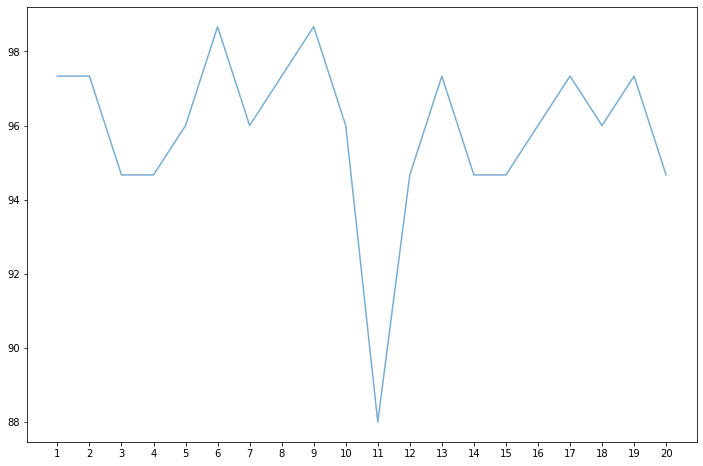

In [9]:
test1()

In [10]:
def test():
    dataset='iris1.data.txt'
    trainingSet=[]
    testSet=[]
    split=0.5 
    loadDataSet(dataset,split,trainingSet,testSet)
    predittions=[]
    k=int(input("k="))
    for x in range(len(testSet)):
            neighbors= getNeighbors(trainingSet,testSet[x],k)
            print("nei=",neighbors)
            result = getResponse(neighbors)
            predittions.append(result)
            print("predict=",result,"real=",testSet[x][-1])
    accuracy = getAccuracy(testSet,predittions)
    print("accuracy=",accuracy,"%")       

In [ ]:
test()

Train: 18
Test: 18


In [ ]:
def main():
    dataset='iris.data'
    trainingSet=[]
    testSet=[]
    split=0.5 
    loadDataSet(dataset,split,trainingSet,testSet)
    predittions=[]
    k=int(input("k="))
    for x in range(len(testSet)):
            neighbors= getNeighbors(trainingSet,testSet[x],k)
            result = getResponse(neighbors)
            predittions.append(result)
            print("predict=",result,"real=",testSet[x][-1])
    accuracy = getAccuracy(testSet,predittions)
    print("accuracy=",accuracy,"%")     

In [ ]:
#main()

##### 

In [ ]:
#test EuclideanDis
test1=[2,2,2,'a']
test2=[4,2,4,'b']
dis=EuclideanDis(test1,test2,3)

In [ ]:
#getNeighborstest
testTrainSet=[[2,2,2,'a'],[4,4,4,'b'],[1,1,1,'c'],[4.5,4,4,'b']]
test=[5,5,5]
testNeighbors=getNeighbors(testTrainSet,test,3)
print(testNeighbors)


In [ ]:
#getResponsetest
print(getResponse(testNeighbors))

In [ ]:
#getAccuracytest
predittions=['a','b','b','b']
accuracy=getAccuracy(testTrainSet,predittions)
print(accuracy)